In [13]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math


from typing import Tuple, List

%matplotlib inline

## high dimensions can be weird
### a geometric example - first 2D

In [438]:
def sphere_packing_plot_2d() -> Tuple[plt.Axes, plt.Figure]:
    fig, ax = plt.subplots(1,1, figsize=(8,8))

    # axes are 4 x 4
    ax.set_xlim((0,4))
    ax.set_ylim((0,4))

    # orienting square
    o_square = plt.Rectangle((1,1),2, 2, fill=False, linewidth=3, zorder=2000)
    ax.add_patch(o_square)
    
    # four circles to enclose center circle
    padding_1 = plt.Circle((1,1),1, color='grey')
    padding_2 = plt.Circle((3,1),1, color='grey')
    padding_3 = plt.Circle((1,3),1, color='grey')
    padding_4 = plt.Circle((3,3),1, color='grey')

    ax.add_patch(padding_1)
    ax.add_patch(padding_2)
    ax.add_patch(padding_3)
    ax.add_patch(padding_4)

    # center circle
    center_circle = plt.Circle((2,2), math.sqrt(2)-1)
    ax.add_patch(center_circle)
    
    # analysis box and labels
    # zoom_in_box = plt.Rectangle((1,1),1,1, color='black',fill=False)
    # ax.add_patch(zoom_in_box)
    ax.plot([2,2],[1,2], c='black', linewidth=1, zorder=1000)
    ax.text(2.05,1.5, '1')
    ax.plot([1,2],[1,1], c='black', linewidth=1, zorder=1000)
    ax.text(1.5,0.9, '1')
    ax.plot([1,2],[1,2], c='black', linewidth=1, zorder=1000)
    ax.text(1.4,1.6,'√2')
    return fig, ax

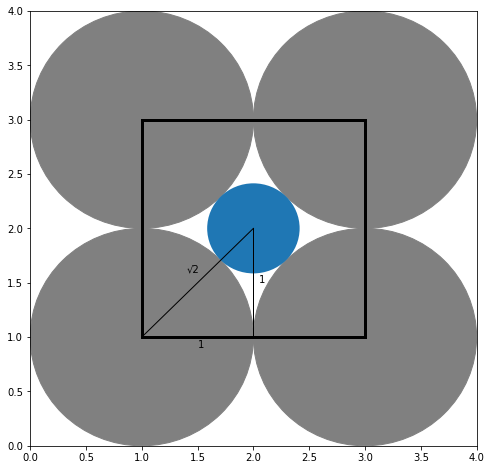

In [439]:
fig, ax = sphere_packing_plot_2d()

plt.show()

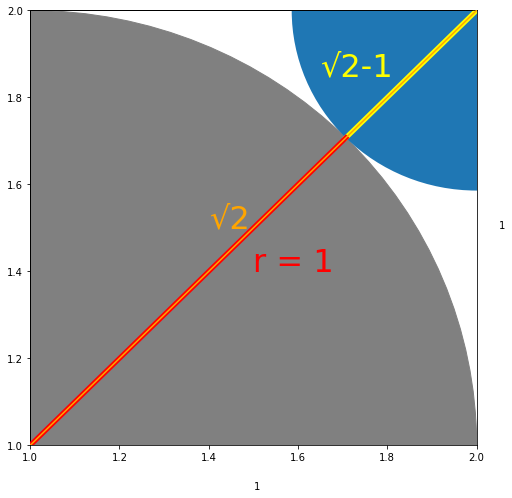

In [397]:
fig, ax = sphere_packing_plot_2d()

# zoom in
ax.set_xlim((1,2))
ax.set_ylim((1,2))

# plot radius
radius_color = 'red'
ax.plot([1,1+1*math.sin((45*(math.pi/180)))], 
        [1,1+1*math.sin((45*(math.pi/180)))], 
        c=radius_color , linewidth=5, zorder=10)
ax.text(1.5, 1.4, 'r = 1', c=radius_color , size='32', zorder=11)

# plot diagonal
diag_color = 'orange'
ax.plot([1,2],[1,2], c=diag_color, zorder=30)
ax.text(1.4, 1.5, '√2', c=diag_color, size='32', zorder = 31)

# plot delta
delta_color = 'yellow'
degs_in_rads = ((180+45)*(math.pi/180))
hypotenuse = math.sqrt(2)-1
opposite = hypotenuse*math.sin(degs_in_rads)
ax.plot([2,2+opposite], 
        [2,2+opposite], 
        c=delta_color, linewidth=5)
ax.text(1.65, 1.85, '√2-1', c=delta_color, size='32')

plt.show()

##  In summary 
## √2 - 1 = 0.4142 is the radius of that central sphere in 2 D



## Now, the same thing, in 3D

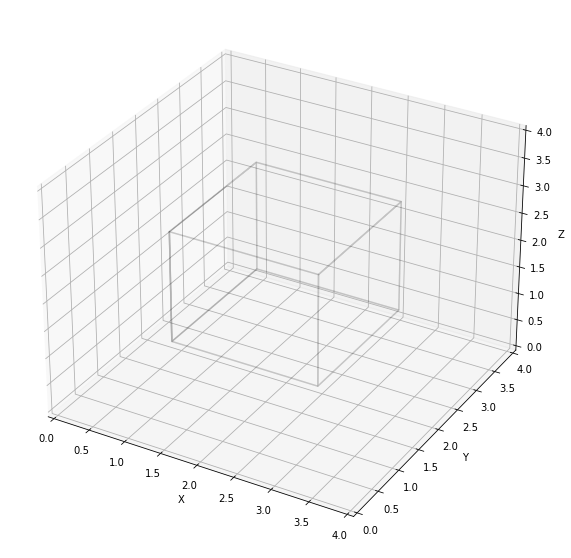

In [11]:
def cuboid_data(center, size):
    """
    Create a data array for cuboid plotting.


    ============= ================================================
    Argument      Description
    ============= ================================================
    center        center of the cuboid, triple
    size          size of the cuboid, triple, (x_length,y_width,z_height)
    :type size: tuple, numpy.array, list
    :param size: size of the cuboid, triple, (x_length,y_width,z_height)
    :type center: tuple, numpy.array, list
    :param center: center of the cuboid, triple, (x,y,z)


    """


    # suppose axis direction: x: to left; y: to inside; z: to upper
    # get the (left, outside, bottom) point
    o = [a - b / 2 for a, b in zip(center, size)]
    # get the length, width, and height
    l, w, h = size
    x = [[o[0], o[0] + l, o[0] + l, o[0], o[0]],  # x coordinate of points in bottom surface
         [o[0], o[0] + l, o[0] + l, o[0], o[0]],  # x coordinate of points in upper surface
         [o[0], o[0] + l, o[0] + l, o[0], o[0]],  # x coordinate of points in outside surface
         [o[0], o[0] + l, o[0] + l, o[0], o[0]]]  # x coordinate of points in inside surface
    y = [[o[1], o[1], o[1] + w, o[1] + w, o[1]],  # y coordinate of points in bottom surface
         [o[1], o[1], o[1] + w, o[1] + w, o[1]],  # y coordinate of points in upper surface
         [o[1], o[1], o[1], o[1], o[1]],          # y coordinate of points in outside surface
         [o[1] + w, o[1] + w, o[1] + w, o[1] + w, o[1] + w]]    # y coordinate of points in inside surface
    z = [[o[2], o[2], o[2], o[2], o[2]],                        # z coordinate of points in bottom surface
         [o[2] + h, o[2] + h, o[2] + h, o[2] + h, o[2] + h],    # z coordinate of points in upper surface
         [o[2], o[2], o[2] + h, o[2] + h, o[2]],                # z coordinate of points in outside surface
         [o[2], o[2], o[2] + h, o[2] + h, o[2]]]                # z coordinate of points in inside surface
    return np.asarray(x), np.asarray(y), np.asarray(z)




center = [2, 2, 2]
length = 1 * 2
width = 1 * 2
height = 1 * 2
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
X, Y, Z = cuboid_data(center, (length, width, height))
ax.plot_wireframe(X, Y, Z, color='k', rstride=1, cstride=1, alpha=0.1)
ax.set_xlabel('X')
ax.set_xlim(0, 4)
ax.set_ylabel('Y')
ax.set_ylim(0, 4)
ax.set_zlabel('Z')
ax.set_zlim(0, 4)
plt.show()

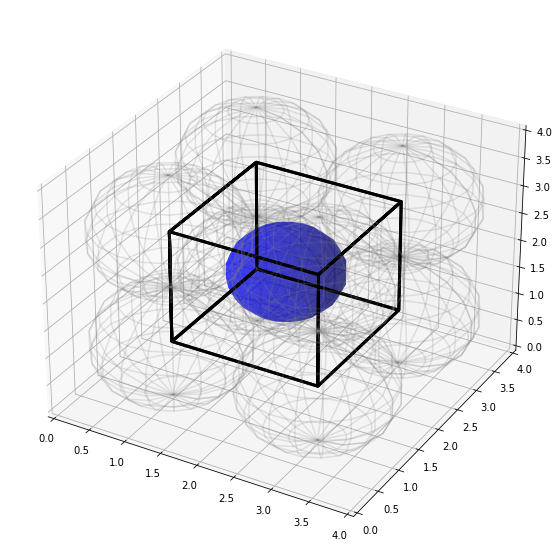

In [21]:
def plot_sphere(x_offset=0, y_offset=0, z_offset=0, r=1) -> Tuple[List[float],List[float],List[float]]:
    u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
    x = r*np.cos(u)*np.sin(v) + x_offset
    y = r*np.sin(u)*np.sin(v) + y_offset
    z = r*np.cos(v) + z_offset
    return x,y,z


    

def plot_sphere_chart() -> Tuple[plt.Figure, plt.Axes]:
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')

    ax.set_xlim((0,4))
    ax.set_ylim((0,4))
    ax.set_zlim((0,4))



    offsets = [(1,1,1),
               (3,1,1),
               (3,3,1),
               (3,3,3),
               (1,3,1),
               (3,1,3),
               (1,1,3),
               (1,3,3),

              ]
    for offset in offsets:
        x_offset, y_offset, z_offset = offset
        x,y,z = plot_sphere(x_offset, y_offset, z_offset)
        ax.plot_wireframe(x, y, z, color="grey", alpha=0.2)
        # ax.plot_surface(x, y, z, color="grey", alpha=0.2)

    # center_sphere
    x,y,z = plot_sphere(2, 2, 2, math.sqrt(3)-1)
    ax.plot_surface(x, y, z, color="blue", alpha=.5)
    
    # orienting cube
    X, Y, Z = cuboid_data(center, (length, width, height))
    ax.plot_wireframe(X, Y, Z, color='k', rstride=1, cstride=1, alpha=1, linewidth=3)
    return fig, ax

plot_sphere_chart()  
plt.show()
    

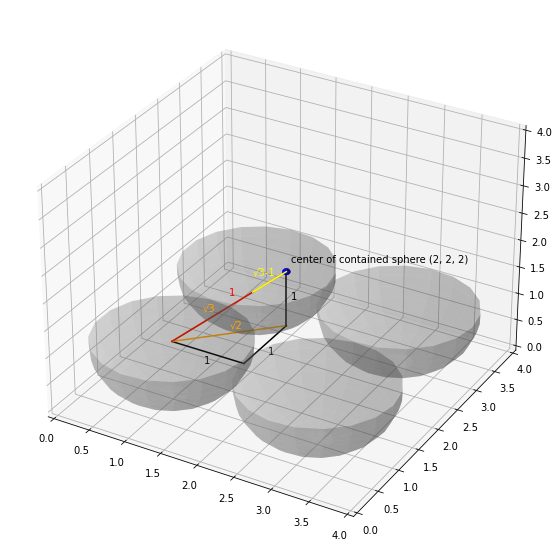

In [383]:
def plot_half_sphere(x_offset=0, y_offset=0, z_offset=0, r=1) -> Tuple[List[float],List[float],List[float]]:
    u, v = np.mgrid[0:2*np.pi:20j, 1.5:np.pi:10j]
    x = r*np.cos(u)*r*np.sin(v) + x_offset
    y = r*np.sin(u)*r*np.sin(v) + y_offset
    z = r*np.cos(v) + z_offset
    return x,y,z

def plot_half_sphere_chart() -> Tuple[plt.Figure, plt.Axes]:
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')

    ax.set_xlim((0,4))
    ax.set_ylim((0,4))
    ax.set_zlim((0,4))



    offsets = [(1,1,1),
               (3,1,1),
               (1,3,1),
               (3,3,1),
              ]
    for offset in offsets:
        x_offset, y_offset, z_offset = offset
        x,y,z = plot_half_sphere(x_offset, y_offset, z_offset)
        ax.plot_surface(x, y, z, color="grey", alpha=0.3)
    
    # center_sphere
#     x,y,z = plot_sphere(2, 2, 2, math.sqrt(3)-1)
#     ax.plot_surface(x, y, z, color="blue", alpha=.1)
    
    # marker_sphere
    dimensions_color = 'black'
    diagonals_color = 'orange'
    x,y,z = plot_sphere(2, 2, 2, 0.05)
    ax.plot_surface(x, y, z, color="blue", alpha=1)
    # plot line coords for lines of interest
    ax.plot(2,2,2, c='blue', markersize=100)
    ax.text(2,2.1,2.1,"center of contained sphere (2, 2, 2)")
    # orig x axis line
    ax.plot3D([1,2],[1,1],[1,1], color=dimensions_color)
    ax.text(1.6,0.75,1,"1")
    # add in z axis line
    ax.plot3D([2,2],[1,2],[1,1], color=dimensions_color)
    ax.text(2.15,1.3,1,"1")
    # orig hypontenuse
    ax.plot3D([1,2],[1,2],[1,1], color=diagonals_color)
    ax.text(1.5,1.5,1.1,"√2",c=diagonals_color,zorder=101)
    # now adding in this dimension line - y?
    ax.plot3D([2,2],[2,2],[1,2], color=dimensions_color)
    ax.text(2,2.1,1.4,"1")
    # new line length
    ax.plot3D([1,2],[1,2],[1,2], color=diagonals_color)
    ax.text(1.25,1.3,1.45,"√3",color=diagonals_color,zorder=100)
    # radius of padding sphere on that line
    line_and_text_color = 'red'
    ax.plot3D([1,1+math.sin(45*np.pi/180)],
              [1,1+math.sin(45*np.pi/180)],
              [1,1+math.sin(45*np.pi/180)], color=line_and_text_color)
    ax.text(1.5,1.5,1.7,"1", color=line_and_text_color)
    # radius of central sphere on that line
    line_and_text_color = 'yellow'
    ax.plot3D([1+math.sin(45*np.pi/180),2],
              [1+math.sin(45*np.pi/180),2],
              [1+math.sin(45*np.pi/180),2], 
              color=line_and_text_color,
              # linewidth=2,
              zorder=1000)
    ax.text(1+math.sin(45*np.pi/180),
            1+math.sin(45*np.pi/180),
            1+math.sin(45*np.pi/180)+0.3,
            "√3-1", color=line_and_text_color)
    return fig, ax

plot_half_sphere_chart()  
plt.show()

# MAIN THING HERE, DON'T ASK TO UNDERSTAND, JUST ASK TO ACCEPT
# be careful about what you are saying is True here.
# highlight the previous examples' context in 2d, 3d here first.
# show how the 2d example maps into this space
# you can see that the hypotenuse in 3d MUST be larger than it was in 2D
# you can calculate that.
# PAUSE
# now take a little mathematical leap of faith with me:
# matheticatially in 4 dimensions the hypotenuse is sqrt(4) - 1
# that is really weird!
# it's very confusing that this happens.

# it's not scary - just know that it's here, it doesn't mean we can't do stuff
# some of this is generalizable. what's the operational comonenet of this for learners, 
# how will they know when it's weird and when it's not

# involve table format at each step - this could be your dataset


# try analytic method. then. # interpret this geometrically.
# table for center of all the balls
# use that to calculate radius of the central ball
# then use that to show the formula Sqrt(n-1) from a series of tables.
# center of lower left ball (1,1,1,1,1) center for central ball(2,2,2,2,2), central ball radius calculation(value)
# 2 d image, table repn
# 3d imagae (better one), tbale repn
# then trust now - in 4d. - value
# how easy to add dimensions, same to do it analytically
# interpretation of the geometry is quite strange.

## √3 -1 = 0.732050...

Bigger! What's going on here? packing spheres the same size, and central sphere still held between them, but more directions that things are in

## The same calculation in 4D

In [345]:
# generalize now to 4d...
# pythagorean therom generalizes to higher dimensions
# sqrt(sum(square of all orthoganal directions))
radius_4d = math.sqrt(sum([1**2,1**2,1**2,1**2]))-1
print(f'radius of central sphere in 4d: {radius_4d}')

radius of central sphere in 4d: 1.0


### summary:
|dimensions|central sphere radius|
|--|--|
|2| 0.41|
|3| 0.73|
|4| 1.0|

## What about higher dimensions? Generalize:

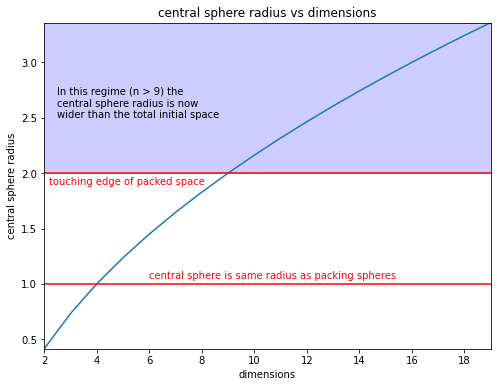

In [432]:
# calculate central sphere radius / dimension
max_d = 20
radii = []
ds = []
for d in range(2, max_d):
    ds.append(d)
    radii.append(math.sqrt(sum([1**2]*d))-1)

# set up plot
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(ds, radii)
ax.set_ylim(min(radii),max(radii))
ax.set_xlim(min(ds),max(ds))
ax.set_xlabel('dimensions')
ax.set_ylabel('central sphere radius')
ax.set_title('central sphere radius vs dimensions')

# annotate plot
markupcolor = 'red'
ax.axhline(1, color=markupcolor) 
ax.annotate('touching edge of packed space', 
            xy=(2.2, 1.5), 
            xytext=(2.2, 1.90), 
            color=markupcolor)
ax.text(2.5, 2.5,
        'In this regime (n > 9) the \ncentral sphere radius is now\nwider than the total initial space',
        color='black')

ax.axhline(2, color=markupcolor)
ax.fill_between([0, 20], [2, 2], [3.5, 3.5], color='blue', alpha=.2)
ax.annotate('central sphere is same radius as packing spheres', 
            xy=(2.2, 1), 
            xytext=(6, 1.05), 
            color=markupcolor)

plt.show()


### main takeaway message: 
#### 3 dimensional intuition doesn't necessarily map into high dimensional spaces

high dimensional spheres are 'spikey'


Translate from 3d intuitions to high dimensions - get wrong conclusion?


# look at a high dimensional dataset

In [3]:
data = datasets.load_breast_cancer()

In [10]:
print(f'data set data type: {type(data)}')
print(f'data set options: {dir(data)}')
print([k for k in data.keys()])
    

data set data type: <class 'sklearn.utils.Bunch'>
data set options: ['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']


In [ ]:
# loaed data
# now explore it - hint functions
# what can you discover?
# if yowuanted to PCA this data, what would you need to know?

# put code in lesson structure
# add in text/markdown between to fill out lesson structure around code

In [141]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [142]:
df = pd.DataFrame(bc.data)

In [143]:
df = df.set_axis(bc.feature_names, axis=1)

In [144]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [146]:
df['labels'] = bc.target

In [147]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,labels
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


/var/folders/l1/lw5v0ldj28152tt1ds0t13300000gp/T/ipykernel_86532/3782539806.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  cm.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


<AxesSubplot:>

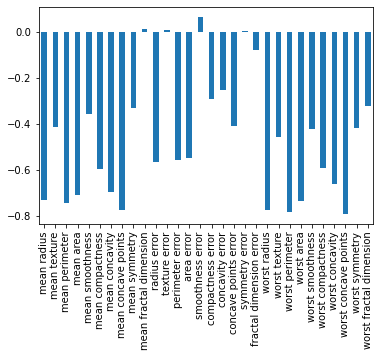

In [204]:
cm = df.corr()
# cm.Styler.format(precision=2)
cm.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)
cm['labels'][:-1].plot.bar()
plt.show()

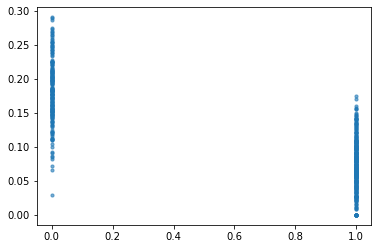

In [286]:
# cols=['labels','worst concave points']
plt.scatter(df['labels'],
            df['worst concave points'],
            s=10,
            alpha=0.6)
plt.show()

array([[<AxesSubplot:xlabel='mean radius', ylabel='mean radius'>,
        <AxesSubplot:xlabel='mean texture', ylabel='mean radius'>,
        <AxesSubplot:xlabel='mean perimeter', ylabel='mean radius'>,
        <AxesSubplot:xlabel='mean area', ylabel='mean radius'>,
        <AxesSubplot:xlabel='mean smoothness', ylabel='mean radius'>,
        <AxesSubplot:xlabel='mean compactness', ylabel='mean radius'>,
        <AxesSubplot:xlabel='mean concavity', ylabel='mean radius'>,
        <AxesSubplot:xlabel='mean concave points', ylabel='mean radius'>,
        <AxesSubplot:xlabel='mean symmetry', ylabel='mean radius'>,
        <AxesSubplot:xlabel='mean fractal dimension', ylabel='mean radius'>,
        <AxesSubplot:xlabel='radius error', ylabel='mean radius'>,
        <AxesSubplot:xlabel='texture error', ylabel='mean radius'>,
        <AxesSubplot:xlabel='perimeter error', ylabel='mean radius'>,
        <AxesSubplot:xlabel='area error', ylabel='mean radius'>,
        <AxesSubplot:xlabel='smooth

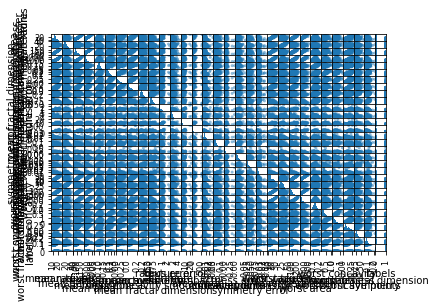

In [289]:
pd.plotting.scatter_matrix(df)
plt.show()
# do a correlation_matrix here?

In [183]:
cols_no_label = df.columns[:-1]
X = df[cols_no_label]

In [149]:
from sklearn.decomposition import PCA
p = PCA(n_components=?)
components = p.fit_transform(?)
# print(p.explained_variance_ratio_)
# which copmonent is the most improtant?

[0.98204467 0.01617649]


Can you plot the cumulative variance?

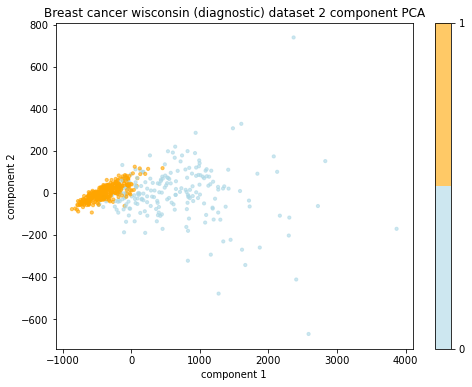

In [276]:
def provided_plotting_function(components):
    x = components[:,0] 
    y = components[:,1]
    fig = plt.figure(figsize=(8,6))
    s = 10
    alpha = .6
    labels  = df['labels'].tolist()
    colors = ['lightblue','orange']
    plt.scatter(x,y,
                s=s,
                c=labels,
                cmap=mpl.colors.ListedColormap(colors), 
                alpha=alpha)
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.title('Breast cancer wisconsin (diagnostic) dataset 2 component PCA')
    cb = plt.colorbar()
    loc = np.arange(0, 2, 1)
    cb.set_ticks(loc)
    plt.show()

In [257]:
pca_df = pd.DataFrame(components, columns=[1,2])
pca_df['labels'] = df['labels']
df_0 = pca_df[pca_df['labels']==0]
df_1 = pca_df[pca_df['labels']==1]

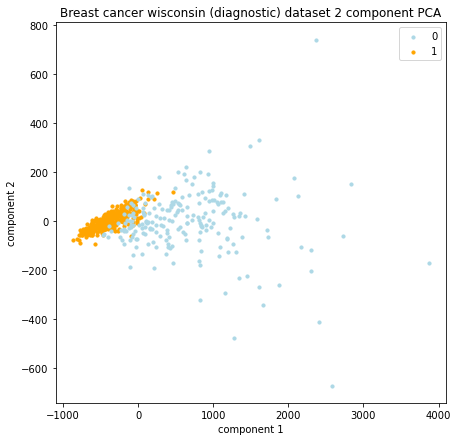

In [274]:
fig = plt.figure(figsize=(7,7))
labels  = df['labels'].tolist()
s = 10
alpha = 1
plt.scatter(df_0[1], df_0[2], s=s, label = '0', c='lightblue', alpha=alpha, zorder=2)
plt.scatter(df_1[1], df_1[2], s=s, label = '1', c='orange', alpha=alpha, zorder=1)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('Breast cancer wisconsin (diagnostic) dataset 2 component PCA')
plt.legend()
plt.show()

In [ ]:
# biplot
# component 1 relates most to what original feature?

# Concrete Exercises

In [59]:
# create synthetic 2D data
X, y = datasets.make_blobs(n_samples=150, # total number of points, split per center
                           n_features=2,  # number of dimensions for the data
                           centers=2,     # number of blobs in the data
                           cluster_std=4, 
                           random_state=1)

In [60]:
np.unique(y)

array([0, 1])

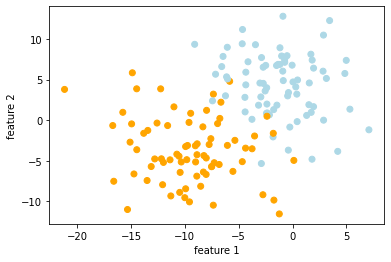

In [61]:
# visualize synthetic data
colors = ['lightblue','orange']
plt.scatter(X[:,0], X[:,1], 
            c=y,
            # labels = [0,1], # np.unique(y),
            cmap=mpl.colors.ListedColormap(colors) )
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()

In [62]:
# perform PCA on synthetic data
from sklearn.decomposition import PCA
p = PCA(n_components=2)
components = p.fit_transform(X)
for feature in p.explained_variance_ratio_:
    print(feature)

0.7246935232070347
0.2753064767929653


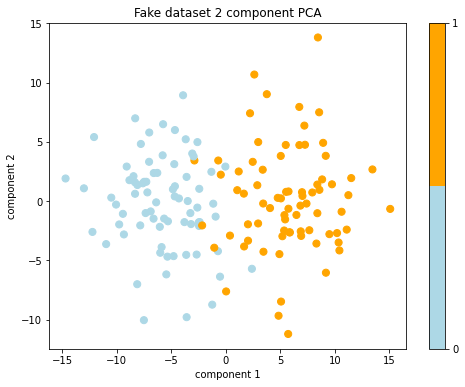

In [63]:
# plot PCA result
feature_1 = components[:,0] 
feature_2 = components[:,1]
fig = plt.figure(figsize=(8,6))
s = 50
alpha = 1
# labels  = df['labels'].tolist()
colors = ['lightblue','orange']
plt.scatter(feature_1, feature_2,
            s=s,
            c=y,
            cmap=mpl.colors.ListedColormap(colors), 
            alpha=alpha)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('Fake dataset 2 component PCA')
cb = plt.colorbar()
loc = np.arange(0, 2, 1)
cb.set_ticks(loc)
plt.show()

PCA discussion: 
https://setosa.io/ev/principal-component-analysis/

In [ ]:
maybe missign a 2d toy example where all you do is rotate

how to connext 30 space

some basic thing about coordiante systems and changes og coordaintes - don't have to use those words
need to have some feelin about what that is

use beginnging o video: ANALOGY
https://www.youtube.com/watch?v=BorcaCtjmog
    
    Then go to the three blobs vis https://setosa.io/ev/principal-component-analysis/
    

Steve: points on a number line (pca)
    
second variable, first large, econd small, still seems mostly 1d. (pca gets pc 1)

rotate to 45 deg line - pc are just change of variables - rotation

concept to add here
    what about not just spinning the axes
    
do the parson's penguins -downlaod nad run.

